# **Navigator: v1.0.0**
Within this section, I aim to provide a comprehensive overview of the Navigator module, including its core functionality and potential avenues for future enhancements as of Dec 2023. This serves as a high-level introduction; for more intricate details, please consult the specific documentation pertaining to individual modules, classes, and functions.

## **Introduction**


The Navigator library is a Python toolkit tailored for GNSS (Global Navigation Satellite System) navigation and positional solutions. Presently, it comprises five distinct sub-modules, each open for independent enhancement and development. These core modules encompass:

1. **parse** \
    This module houses tools for parsing [RINEX](https://igs.org/wg/rinex/) files, supporting RINEXv3 and RINEXv2. It proficiently parses observation and navigation files into a [pandas.DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html), serving as the backend data format for processing.

2. **satlib**\
    This module incorporates mathematical tools for computing satellite and user positions. It divides into two key segments:
    1. **satellite**\
        This section encompasses the satellite class and the complete ephemeris interface for satellite position calculation.
        
    2. **triangulate**\
        Housing the triangulate class, this segment utilizes the satellite class to compute user positions, analyzing either a single epoch or a series of epochs, i.e., timeseries data.

3. **download**\
    Primarily used for fetching RINEX files from [CDDIS](https://cddis.nasa.gov/Data_and_Derived_Products/CDDIS_Archive_Access.html) and others FTP servers, this module handles both RINEXv2 and RINEXv3 downloads. While users typically don't interact with this module programmatically, CLI tools are available for this purpose.

4. **utility**\
    Encompassing various utility functions within the library, including the *Epoch Class*, *Transformations*, *CLI Tools*, etc.

5. **dispatch**\
    Though currently unimplemented, this module is intended for potential future utilization, specifically for scaling the library to a distributed system for processing extensive datasets.


## **Installation**


To install the library, user need to clone the repository from **Pntf Lab Server**(*10.116.24.69*) which is only accessible to authorized lab members. To use the **Lab Git Server**, user need to have access to the git user account. If you don't have access to the git user account, please contact the lab administrator.

The repository can be cloned using the following command which requires git user account password:
```bash
git clone -b main git@10.116.24.69:/home/git/Navigator.git:main
```

Once the repository is cloned, user can install the library using the following command:
```bash
cd Navigator
pip install -e Navigator
```

## **Usage**


The introduction usage of the library is documented in the *docs* directory. It provides basic usage of the library and its modules. Curretly three introductory notebooks are available in the *docs* directory. These notebooks are:
1. [Intro to Parsing](../intro/intro_parsing_and_interpolation.ipynb)
2. [Intro to Traingulation](../intro/intro_triangulation.ipynb)
3. [Intro to Epoch Directory](../intro/epoch_directory_tutorial.ipynb)

Other notebooks will be added in the future to provide more detailed usage of the library.

## **Summary Report**

### **Data and File Formats**

To perform SPP (Single Point Positioning) and PPP (Precise Point Positioning), generally many data and file formats are required (see [fileformats](https://gssc.esa.int/education/library/standards-and-data-formats/)).

There are two main files need to perorm the SPP. These files are:
1. [RINEX Observation File](https://server.gage.upc.edu/gLAB/HTML/Observation_Rinex_v3.01.html)\
    The observtional file is recorded by the receiver and contains the *pseudorange* and *carrier phase* measurements of the satellites.
    
- [RINEX Navigation File](https://server.gage.upc.edu/gLAB/HTML/GPS_Navigation_Rinex_v3.04.html)\
    The navigation file contains the satellite ephemeris data which is used to compute the satellite position.


A useful visual representation of the data and file formats is available [here](https://gage.upc.edu/en/learning-materials/library/gnss-format-descriptions).


In [1]:
%load_ext autoreload
%autoreload 2
# Let's see how it looks
from navigator.parse import Parser, IParseGPSObs
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Test file path
obs_path = Path(
    "./data/KOKB00USA_R_20220010000_01D_30S_MO.crx.gz"
)
parser = Parser(iparser=IParseGPSObs())

metadata, data = parser(filepath=obs_path)

In [2]:
data.head()

C1C           L1C     S1C           C1W     S1W  \
time       sv                                                              
2022-01-01 G05  2.176958e+07  1.143999e+08  46.344  2.176958e+07  38.469   
           G14  2.154274e+07  1.132080e+08  47.719  2.154274e+07  40.344   
           G15  2.238564e+07  1.176374e+08  44.469  2.238564e+07  34.406   
           G17  2.214970e+07  1.163976e+08  45.969  2.214970e+07  35.812   
           G24  2.445840e+07  1.285297e+08  33.750  2.445840e+07  28.531   

                         C2W           L2W     S2W           C2L  \
time       sv                                                      
2022-01-01 G05  2.176958e+07  8.914279e+07  38.469  2.176959e+07   
           G14  2.154275e+07  8.821407e+07  40.344  2.154275e+07   
           G15  2.238564e+07  9.166551e+07  34.406  2.238564e+07   
           G17  2.214970e+07  9.069946e+07  35.812  2.214970e+07   
           G24  2.445841e+07  1.001531e+08  28.531  2.445841e+07   

                         L2L     S2L           C5Q           L5Q     S5Q  \
time       sv                                                              
2022-01-01 G05  8.914279e+07  45.125           NaN           NaN     NaN   
           G14  8.821407e+07  48.000  2.154274e+07  8.453848e+07  41.469   
           G15  9.166552e+07  42.438           NaN           NaN     NaN   
           G17  9.069946e+07  41.688           NaN           NaN     NaN   
           G24  1.001531e+08  37.750  2.445840e+07           NaN  29.219   

                         C1L           L1L     S1L  
time       sv                                       
2022-01-01 G05           NaN           NaN     NaN  
           G14  2.154274e+07  1.132080e+08  48.219  
           G15           NaN           NaN     NaN  
           G17           NaN           NaN     NaN  
           G24           NaN           NaN     NaN

As you can see, the observational data are structured by (time, sv) coordinate. The time here is in (GPS time) which also contains reciever 
clock bias since it it recorded by the reciever.

The other columns are code and phase measurments for respective satellites at respective epoch. Let's see how the code (C1C) changes over time for a satellite (G03) in the following figure.

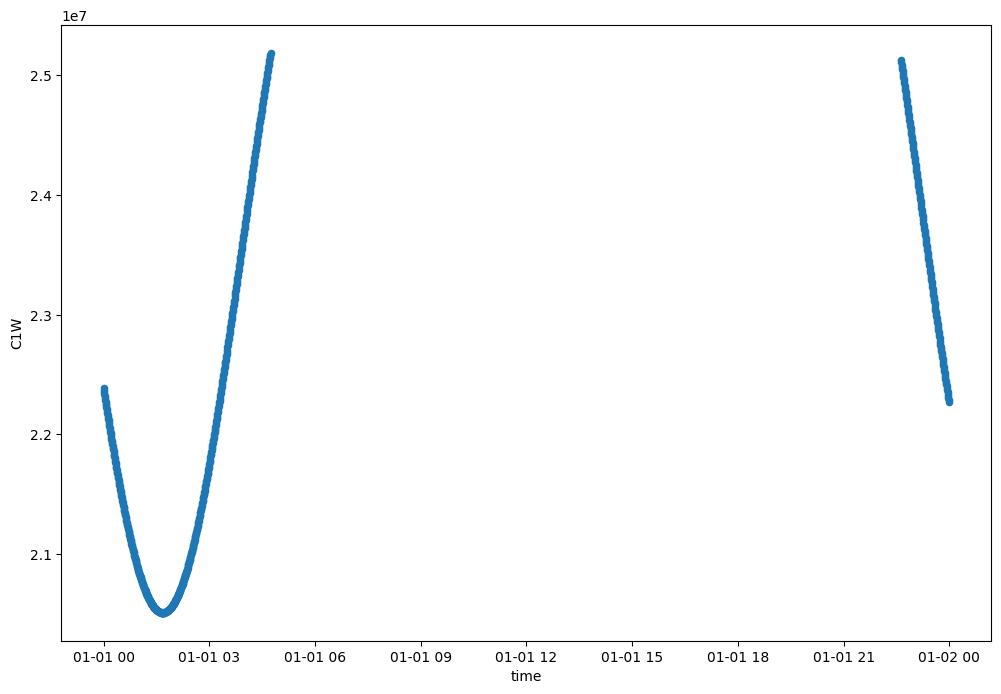

In [3]:
sv15 = data.xs('G15', level='sv').reset_index()
sv15.plot(x='time', y='C1W', kind='scatter', figsize=(12, 8));

This indicates the satellite is radially moving away from the receiver vanishishs and reappears after a while.

We can also see the diffrence between the difference between the code on L1 and L2 frequency. This indicates the inospheric interference.

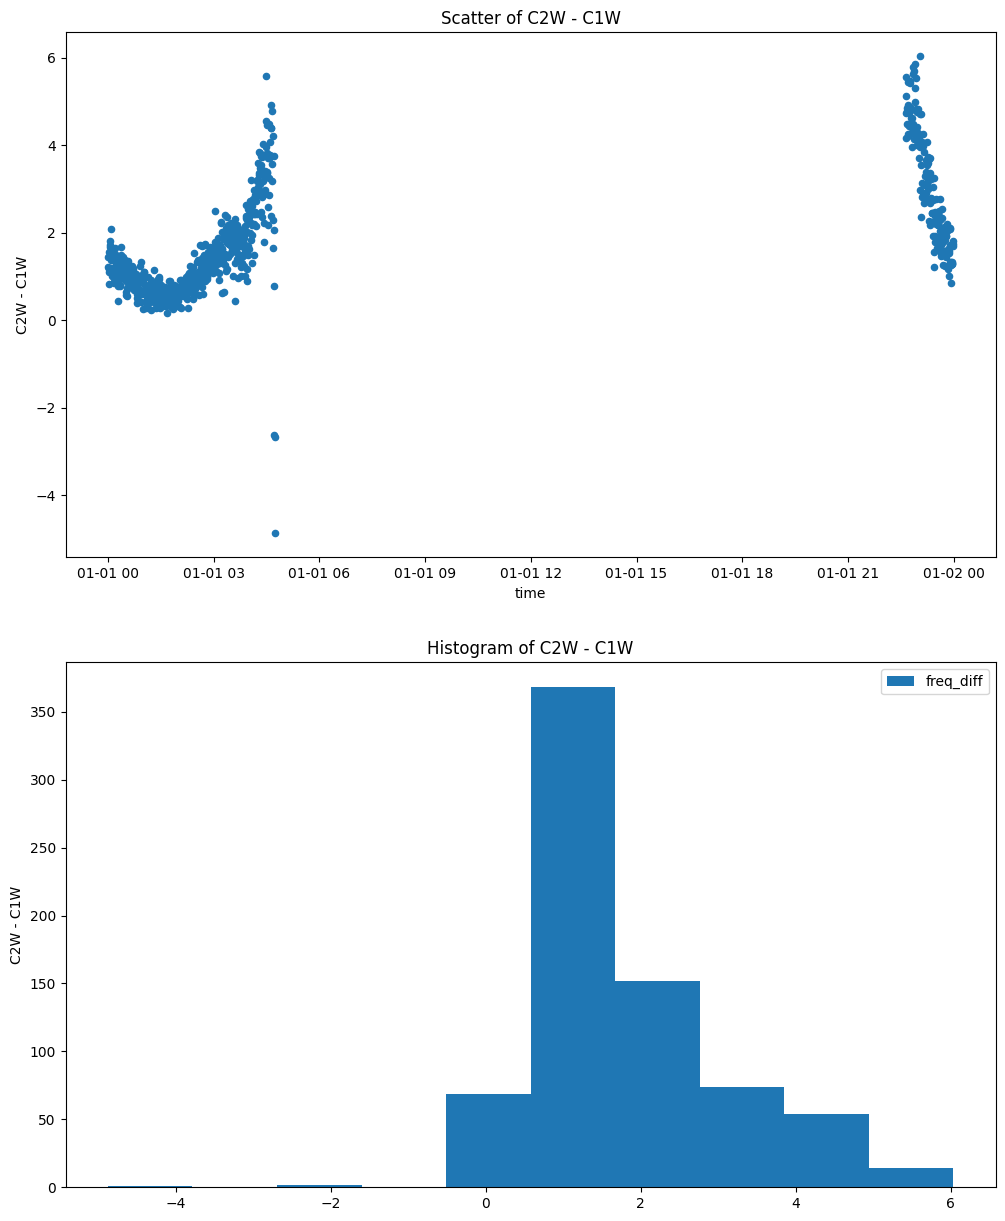

In [4]:
sv15['freq_diff'] = sv15['C2W'] - sv15['C1W']

fig, ax = plt.subplots(2, 1, figsize=(12, 15))

sv15.plot(
    x='time',
    y='freq_diff',
    kind='scatter',
    ylabel='C2W - C1W',
    ax=ax[0],
    title='Scatter of C2W - C1W',
)
sv15.plot(
    y='freq_diff',
    kind='hist',
    ylabel='C2W - C1W',
    ax=ax[1],
    title='Histogram of C2W - C1W',
);

In [5]:
# Let's see how the navigation data looks
from navigator.parse import IParseGPSNav

# Nav file path
nav_path = Path(
    "./data/KOKB00USA_R_20220010000_01D_GN.rnx.gz"
)
# Swap the parser
parser.swap(iparser=IParseGPSNav())

# Read the navigation data
metadata, data_nav = parser(filepath=nav_path)

In [6]:
data_nav.head()

SVclockBias  SVclockDrift  SVclockDriftRate  IODE        Crs  \
time       sv                                                                  
2022-01-01 G02    -0.000647 -1.136868e-12               0.0  41.0 -142.71875   
           G05    -0.000066 -1.364242e-12               0.0  74.0  -83.71875   
           G06     0.000158  1.057288e-11               0.0  31.0 -158.65625   
           G07     0.000297  3.979039e-12               0.0  11.0   -0.87500   
           G09    -0.000359  9.094947e-13               0.0  57.0   13.78125   

                      DeltaN        M0           Cuc  Eccentricity       Cus  \
time       sv                                                                  
2022-01-01 G02  4.556261e-09 -0.453245 -7.487833e-06      0.020639  0.000004   
           G05  4.195175e-09  2.018493 -4.371628e-06      0.005894  0.000012   
           G06  3.866590e-09 -0.240535 -8.216128e-06      0.002569  0.000005   
           G07  4.839844e-09 -1.281304  5.401671e-08      0.015394  0.000008   
           G09  5.036638e-09  2.009202  7.357448e-07      0.002371  0.000006   

                ...  GPSWeek  L2Pflag  SVacc  health           TGD  IODC  \
time       sv   ...                                                        
2022-01-01 G02  ...   2190.0      0.0    2.0     0.0 -1.769513e-08  41.0   
           G05  ...   2190.0      0.0    2.0     0.0 -1.117587e-08  74.0   
           G06  ...   2190.0      0.0    2.0     0.0  4.190952e-09  31.0   
           G07  ...   2190.0      0.0    2.0     0.0 -1.117587e-08  11.0   
           G09  ...   2190.0      0.0    2.0     0.0  1.396984e-09  57.0   

                TransTime  FitIntvl  spare0  spare1  
time       sv                                        
2022-01-01 G02   511218.0       4.0     NaN     NaN  
           G05   511218.0       4.0     NaN     NaN  
           G06   511218.0       4.0     NaN     NaN  
           G07   511218.0       4.0     NaN     NaN  
           G09   511218.0       4.0     NaN     NaN  

[5 rows x 31 columns]

#### **The Confusion : Toc and Toe**     

Last time we were confused about the Toc and Toe. Let's see what they are and how they are different.

1. Toc (Time of Clock) \
    This time is a reference time for correcting satellite clock. Any time announced by the given satellite is biased due to clock error. 
    If t is the time announced by the satellite, then the actual time is t - dt, where dt is the clock error. The Toc is the reference time for calculating the clock error. The clock error is calculated by the following equation:
    ```math
    dt = a0 + a1(t - Toc) + a2(t - Toc)^2
    ```
    where a0, a1, a2 are the clock bias, drift and drift rate respectively.  Clearly, when t = Toc, the clock error is zero. Hence Toc is time when the clock error is minimum.[Ref 2]

2. Toe (Time of Ephemeris) \
    This time is the reference time for calculating the satellite position. To solve the initial value problem of satellite position, we need to know the initial position and velocity of the satellite or keplerain elements at some time. The Toe is the reference time for calculating the initial position and velocity. The high level equation for calculating the satellite position is:
    ```math
    F(t, K(t_0)) = X(t)
    ```
    where F is the function that calculates the satellite position at time t, K(t_0) is the keplerian elements at time t_0 and X(t) is the satellite position at time t.

    

To make this apparent, let's see the toe distribution in the following figure.

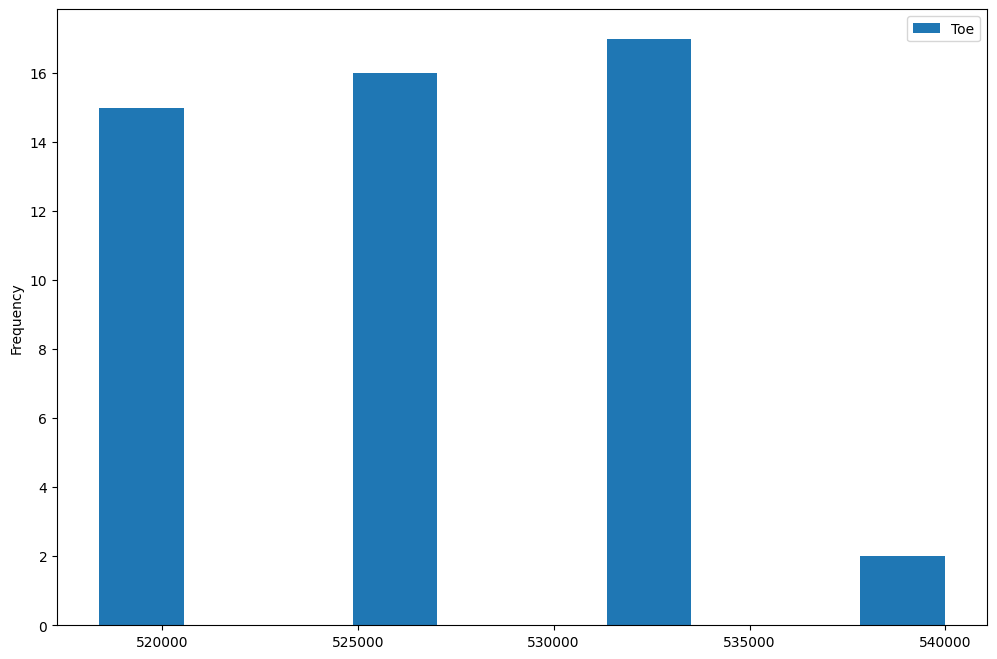

In [7]:
data_nav.iloc[:50].plot(y='Toe', kind='hist', figsize=(12, 8), bins=10);

As we can see it is updated almost every 2 hours from the distribution.

Now, let's see how the clock correction data is distributed:


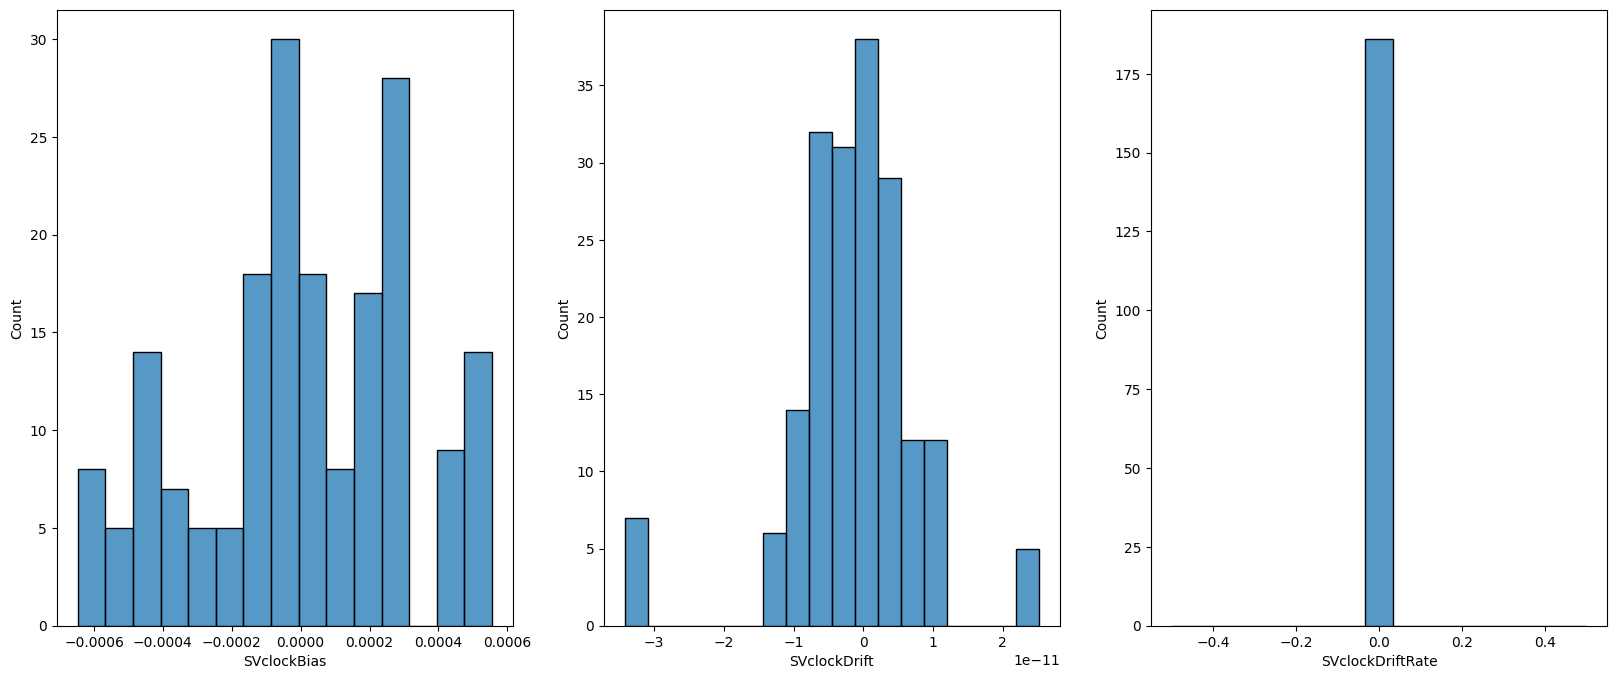

In [8]:
# Get 3 * 1 grid from seaborn
fig, ax = plt.subplots(1, 3, figsize=(20, 8))

# Plot the data
sns.histplot(data=data_nav, x='SVclockBias', ax=ax[0], bins=15)
sns.histplot(data=data_nav, x='SVclockDrift', ax=ax[1])
sns.histplot(data=data_nav, x='SVclockDriftRate', ax=ax[2], bins=15);

As you can see the clock bias and drift rate term is normally distributed around zero with dirft term almost zero. The dirft rate is zero for all the satellites.

### **Methodology**

The procdure for traingulation includes two main steps. These are:
- Calculating the satellite position at time of emission time
- Trianguating the user position using algorithm like Newton's method

#### **Calculating Satellite Position Emission Time**


The only information we have are the time of reception measured in reciever clock and satellite clock offset. There are two way of calculationg the satellite emission tied to satellite clock time and reciever clock time. These are:
1. Using the satellite clock time (See [ESA](https://gssc.esa.int/navipedia/GNSS_Book/ESA_GNSS-Book_TM-23_Vol_I.pdf) Chapter 5.1.1.1) \
    In this process, the time of emission in GPS time is calculated as:
    ```math
    T[emission] = T[reciever] - R/c - dt_sv
    ```
    where R is pseudorange, c is the speed of light and dt_sv is the satellite clock offset.
    
2. Using the reciever clock time (See [ESA](https://gssc.esa.int/navipedia/GNSS_Book/ESA_GNSS-Book_TM-23_Vol_I.pdf) Chapter 5.1.1.1)
    In this process, the time of emission in GPS time is calculated by the previous solutions of triangulation. The time of emission is calculated as:
    ```math
    T[emission] = T[reciever] - ||R_sat - R[reciever]||/c - dt_rcv
    ```
    where R_sat is the previous satellite position, R[reciever] is approximated reciever position, c is the speed of light and dt_rcv is the reciever clock offset.
    
In our case, we are using the first method to calculate the satellite emission time. This way eliminates the need to know the reciever clock offset apriori.

Let's see how the satellite position is calculated at a given time of emission.

In [9]:
from navigator.core import Satellite, IGPSEphemeris

# Create a gps satellite object
sat = Satellite(iephemeris=IGPSEphemeris())

Let grab the satellite ephemeris at 2022-01-01 00:00:00.000000 and calculate the position at that time.

In [10]:
# Data of zero hour
hr0 = data_nav.index[:2]
data_hr0 = data_nav.loc[hr0]
data_hr0.head()

SVclockBias  SVclockDrift  SVclockDriftRate  IODE        Crs  \
time       sv                                                                  
2022-01-01 G02    -0.000647 -1.136868e-12               0.0  41.0 -142.71875   
           G05    -0.000066 -1.364242e-12               0.0  74.0  -83.71875   

                      DeltaN        M0       Cuc  Eccentricity       Cus  ...  \
time       sv                                                             ...   
2022-01-01 G02  4.556261e-09 -0.453245 -0.000007      0.020639  0.000004  ...   
           G05  4.195175e-09  2.018493 -0.000004      0.005894  0.000012  ...   

                GPSWeek  L2Pflag  SVacc  health           TGD  IODC  \
time       sv                                                         
2022-01-01 G02   2190.0      0.0    2.0     0.0 -1.769513e-08  41.0   
           G05   2190.0      0.0    2.0     0.0 -1.117587e-08  74.0   

                TransTime  FitIntvl  spare0  spare1  
time       sv                                        
2022-01-01 G02   511218.0       4.0     NaN     NaN  
           G05   511218.0       4.0     NaN     NaN  

[2 rows x 31 columns]

In [11]:
t_sv = data_hr0.index[0][0]
t_sv

Timestamp('2022-01-01 00:00:00')

In [12]:
coord = sat(t_sv, metadata=None, data=data_hr0)
coord

x               y                z        dt
time       sv                                                             
2022-01-01 G02 -16193811.914214  4121950.046215 -20009560.587452 -0.000647
           G05 -26012158.516871  5285764.981943   2125419.657271 -0.000066

This `IGPSEphemeris` class claculates the position and clock offeset using the formulas form [ICD](https://www.gps.gov/technical/icwg/IS-GPS-200N.pdf) (section 20.3.3.3.3.1 and 20.3.3.4.3.1) for GPS satellites.

Let's plot the trajectory of the satellite for two hours from the t_sv.

In [13]:
trajectory = sat.trajectory(
    t_sv=t_sv, metadata=None, data=data_hr0, interval=2 * 60 * 60, step=100
);

Let's plot the trajectory.

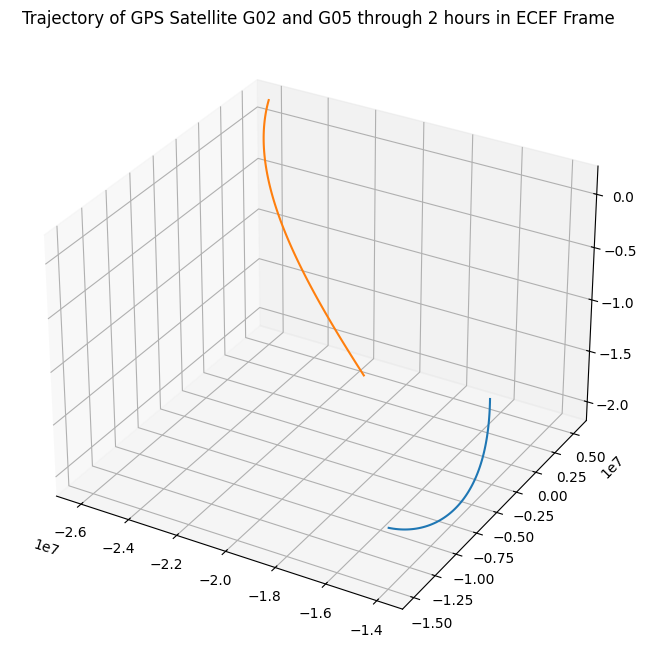

In [15]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Trajectory of GPS Satellite G02 and G05 through 2 hours in ECEF Frame')
for i in range(trajectory.shape[0]):  # For each satellite
    ax.plot(trajectory[i][0], trajectory[i][1], trajectory[i][2])  # Plot the trajectory

If we try to interplote to more that 150 minutes, we will get exponential error in satellite position.

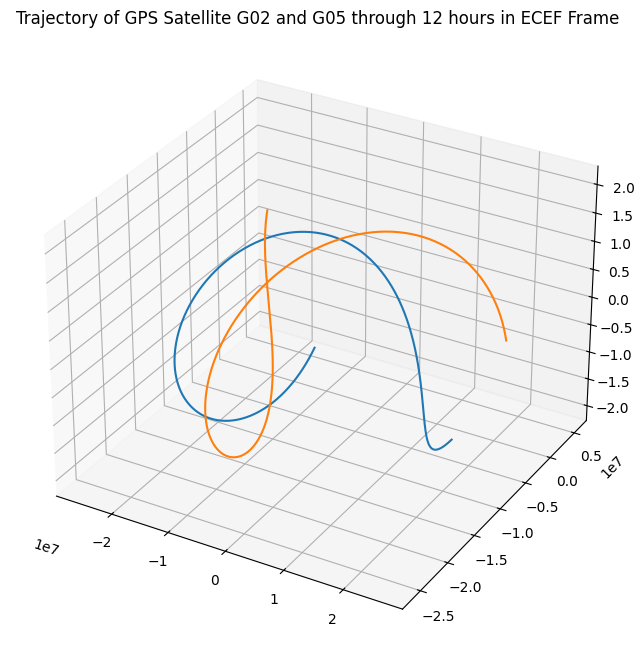

In [16]:
trajectory = sat.trajectory(
    t_sv=t_sv,
    metadata=None,
    data=data_hr0,
    interval=12 * 60 * 60,  # 12 hours
    step=100,
)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Trajectory of GPS Satellite G02 and G05 through 12 hours in ECEF Frame')
for i in range(trajectory.shape[0]):  # For each satellite
    ax.plot(trajectory[i][0], trajectory[i][1], trajectory[i][2])  # Plot the trajectory

As we can see the satellite trajectory is not exactly elliptical. This is because we observed the satellite from the earth which is rotating. To obtain the epllipse,
we have to rotate the satellite position by the earth rotation angle. 

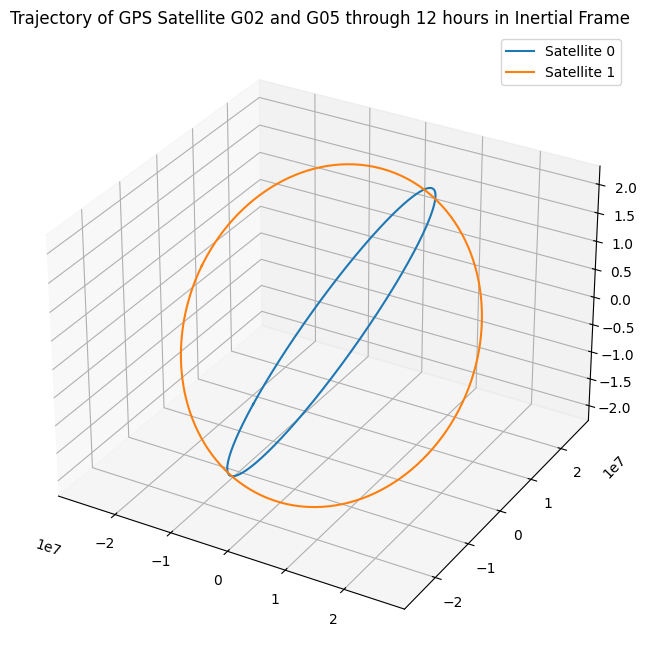

In [25]:
# Earth rotation rate
omega_e = 7.2921151467e-5  # rad/s

# Let's rotate the trajectory by 90 degrees starting from 0 index
from navigator.utility.transforms.crs_to_trs_rotations import R3

rotated_trajectory = trajectory.copy()

# For each satellite
for i in range(rotated_trajectory.shape[0]):
    # For each time step
    for j in range(rotated_trajectory.shape[2]):
        # Rotate the trajectory
        rotated_trajectory[i, :, j] = R3(-1 * omega_e * j * 100) @ rotated_trajectory[i, :, j]

# Plot the rotated trajectory
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.set_title(
    'Trajectory of GPS Satellite G02 and G05 through 12 hours in Inertial Frame'
)
for i in range(rotated_trajectory.shape[0]):  # For each satellite
    ax.plot(
        rotated_trajectory[i][0],
        rotated_trajectory[i][1],
        rotated_trajectory[i][2],
        label=f'Satellite {i}',
    )  # Plot the trajectory

ax.legend();


#### **Triangulating User Position**

As we now can calculate the satellite position at time of emission, we can now triangulate the user position. The triangulation is done using the linearized navigation equations.(See [ESA](https://gssc.esa.int/navipedia/GNSS_Book/ESA_GNSS-Book_TM-23_Vol_I.pdf) Chapter 6 : Code Based Positioning).

This can be improved by using the filter based approach like Kalman Filter.

##### **Epoch: The Unit**
Theoretically, we don't need anything beside the rinex files to perform the triangulation. However, I have implemented a class called `Epoch` which is a wrapper around the rinex files. This class contatis the following information:
- Observation Data for a given receiver epoch
- Nearest satellite ephemeris data for a given receiver epoch
- Epoch time

This forms a unit of data for triangulation. Moreover, Epoch class also contains guards for invalid data. Let's see how the Epoch class works.

In [16]:
from navigator.epoch import Epoch

# Get the epoches in the file
epoches = list(Epoch.epochify(obs=obs_path, nav=nav_path, mode='maxsv'))

This breaks down the epoches in the nav and obs files and wraps them in the `Epoch` class. Let's see how many epoches are there in the data.

In [17]:
len(epoches)

2880

There are 2880 epoches in the data which can be indivually triangulated. 

In [18]:
first_epoch = epoches[0]

In [19]:
first_epoch

Epoch(timestamp=2022-01-01 00:00:00, sv=6)

As we can see that first epoch of observation is at 2022-01-01 00:00:00.000000  which contains 6 satellites and their ephemeris.

In [20]:
first_epoch.obs_data

,C1C,L1C,S1C,C1W,S1W,C2W,L2W,S2W,C2L,L2L,S2L,C5Q,L5Q,S5Q,C1L,L1L,S1L
sv,,,,,,,,,,,,,,,,,
G05,2.176958e+07,1.143999e+08,46.344,2.176958e+07,38.469,2.176958e+07,8.914279e+07,38.469,2.176959e+07,8.914279e+07,45.125,NaN,NaN,NaN,NaN,NaN,NaN
G14,2.154274e+07,1.132080e+08,47.719,2.154274e+07,40.344,2.154275e+07,8.821407e+07,40.344,2.154275e+07,8.821407e+07,48.000,2.154274e+07,8.453848e+07,41.469,2.154274e+07,1.132080e+08,48.219
G15,2.238564e+07,1.176374e+08,44.469,2.238564e+07,34.406,2.238564e+07,9.166551e+07,34.406,2.238564e+07,9.166552e+07,42.438,NaN,NaN,NaN,NaN,NaN,NaN
G17,2.214970e+07,1.163976e+08,45.969,2.214970e+07,35.812,2.214970e+07,9.069946e+07,35.812,2.214970e+07,9.069946e+07,41.688,NaN,NaN,NaN,NaN,NaN,NaN
G24,2.445840e+07,1.285297e+08,33.750,2.445840e+07,28.531,2.445841e+07,1.001531e+08,28.531,2.445841e+07,1.001531e+08,37.750,2.445840e+07,NaN,29.219,NaN,NaN,NaN
G30,2.328294e+07,1.223527e+08,42.656,2.328294e+07,29.344,2.328295e+07,9.533977e+07,29.344,2.328295e+07,9.533976e+07,40.188,2.328294e+07,9.136726e+07,37.031,NaN,NaN,NaN


In [21]:
first_epoch.nav_data

SVclockBias  SVclockDrift  SVclockDriftRate   IODE        Crs  \
time       sv                                                                   
2022-01-01 G05    -0.000066 -1.364242e-12               0.0   74.0  -83.71875   
           G14    -0.000064 -5.684342e-12               0.0   23.0  144.96875   
           G15    -0.000095  2.842171e-12               0.0   71.0   15.25000   
           G17     0.000555  5.115908e-12               0.0  103.0   47.93750   
           G24     0.000277  7.958079e-13               0.0   69.0  -10.96875   
           G30    -0.000504 -2.728484e-12               0.0   84.0    0.03125   

                      DeltaN        M0           Cuc  Eccentricity  \
time       sv                                                        
2022-01-01 G05  4.195175e-09  2.018493 -4.371628e-06      0.005894   
           G14  4.394469e-09 -1.935891  7.504597e-06      0.001267   
           G15  5.637378e-09  0.668019  9.108335e-07      0.013920   
           G17  4.363039e-09  1.592368  2.106652e-06      0.013756   
           G24  5.471299e-09 -0.311958 -4.749745e-07      0.012241   
           G30  5.183073e-09 -1.281966 -1.396984e-07      0.005382   

                         Cus  ...  GPSWeek  L2Pflag  SVacc  health  \
time       sv                 ...                                    
2022-01-01 G05  1.231395e-05  ...   2190.0      0.0    2.0     0.0   
           G14  9.756535e-06  ...   2190.0      0.0    2.0     0.0   
           G15  6.519258e-06  ...   2190.0      0.0    2.0     0.0   
           G17 -3.334135e-07  ...   2190.0      0.0    2.0     0.0   
           G24  7.964671e-06  ...   2190.0      0.0    2.0     0.0   
           G30  8.620322e-06  ...   2190.0      0.0    2.0     0.0   

                         TGD   IODC  TransTime  FitIntvl  spare0  spare1  
time       sv                                                             
2022-01-01 G05 -1.117587e-08   74.0   511218.0       4.0     NaN     NaN  
           G14 -7.916242e-09  535.0   511218.0       4.0     NaN     NaN  
           G15 -1.071021e-08   71.0   513738.0       4.0     NaN     NaN  
           G17 -1.117587e-08  103.0   512226.0       4.0     NaN     NaN  
           G24  2.328306e-09   69.0   517068.0       4.0     NaN     NaN  
           G30  3.725290e-09   84.0   511218.0       4.0     NaN     NaN  

[6 rows x 31 columns]

All the navigation and observation data are stored in the `Epoch` class in their respective attribute.

In [22]:
first_epoch.station

'KOKB00USA'

Moreover, if the rinex files are named in NASA convention and taken from one of the IGS stations, the `Epoch` class can identify
the station code. This provides a way to know the coordinate of station to compare with the triangulated position.

##### **Triangulating of Single Epoch**

Now let's triangulate the first epoch of the data to get the user position.

In [23]:
from navigator.core import Triangulate, IterativeTriangulationInterface


# Create a triangulation object
triangulator = Triangulate(interface=IterativeTriangulationInterface())

Create a `Triangulate` class instance and add the GPSIterative interface to it.

In [24]:
# Triangulate the first epoch
triangulator(obs=first_epoch, obs_metadata=None, nav_metadata=None)

x        -5.543846e+06
y        -2.054589e+06
z         2.387817e+06
dt        3.867371e-03
lat       2.212629e+01
lon      -1.596649e+02
height    1.177444e+03
GDOP      2.950588e+00
PDOP      2.619882e+00
TDOP      1.357272e+00
dtype: float64

As we can see, the traingulator returns *x,y,z* coordinates of the user position with *lat, long* and *height*. The dilution of precision (DOP) is also calculated for the triangulated position.

##### **Time Series Epoch Triangulation**

We can also triangulate the whole data to get a time series of user position and see the error with respect to the time. Let's triangulate the whole data and plot the coordinates and error.

If the data is from an IGS station, we can also get the euclidean distance between the triangulated position and the station position and plot it. This is achieved by `Triangulate.igs_diff` method.

In [25]:
# Sort the epoches with respect to time
epoches.sort()

In [26]:
epoches[:10]

[Epoch(timestamp=2022-01-01 00:00:00, sv=6),
 Epoch(timestamp=2022-01-01 00:00:30, sv=6),
 Epoch(timestamp=2022-01-01 00:01:00, sv=6),
 Epoch(timestamp=2022-01-01 00:01:30, sv=6),
 Epoch(timestamp=2022-01-01 00:02:00, sv=6),
 Epoch(timestamp=2022-01-01 00:02:30, sv=6),
 Epoch(timestamp=2022-01-01 00:03:00, sv=6),
 Epoch(timestamp=2022-01-01 00:03:30, sv=6),
 Epoch(timestamp=2022-01-01 00:04:00, sv=6),
 Epoch(timestamp=2022-01-01 00:04:30, sv=6)]

Now, the epoches are linearly time spaced. 

In [27]:
import pandas as pd

# Lets traingulate all the epoches
df = []

for epoch in epoches:
    df.append(triangulator.igs_diff(obs=epoch, obs_metadata=None, nav_metadata=None))

In [28]:
# Convert to dataframe
df = pd.DataFrame(df)

Now, we can see the dataframe of the triangulated position and the error with respect to the time.

In [29]:
df

,x,y,z,dt,lat,lon,height,GDOP,PDOP,TDOP,diff
0,-5.543846e+06,-2.054589e+06,2.387817e+06,0.003867,22.126294,-159.664929,1177.444245,2.950588,2.619882,1.357272,10.463276
1,-5.543846e+06,-2.054589e+06,2.387815e+06,0.003866,22.126280,-159.664936,1176.321862,2.962691,2.630132,1.363798,9.016246
2,-5.543848e+06,-2.054591e+06,2.387818e+06,0.003864,22.126297,-159.664919,1180.636225,2.974706,2.640316,1.370257,13.666205
3,-5.543849e+06,-2.054592e+06,2.387818e+06,0.003863,22.126290,-159.664917,1181.765087,2.986621,2.650425,1.376646,14.598756
4,-5.543844e+06,-2.054589e+06,2.387815e+06,0.003862,22.126288,-159.664927,1175.106757,2.998427,2.660450,1.382958,8.056575
...,...,...,...,...,...,...,...,...,...,...,...
2875,-5.543838e+06,-2.054586e+06,2.387812e+06,0.004632,22.126281,-159.664932,1167.899048,5.638156,4.814267,2.934559,1.935428
2876,-5.543838e+06,-2.054586e+06,2.387812e+06,0.004617,22.126278,-159.664936,1167.740800,5.686951,4.856223,2.959479,1.737846
2877,-5.543832e+06,-2.054583e+06,2.387808e+06,0.004601,22.126268,-159.664944,1159.379352,5.734787,4.897416,2.983806,8.283772
2878,-5.543836e+06,-2.054585e+06,2.387810e+06,0.004585,22.126268,-159.664937,1164.615800,5.781536,4.937740,3.007471,3.035910


As we had 2880 epoches, we have 2880 triangulated position. Let's plot the error (diff) distribution.

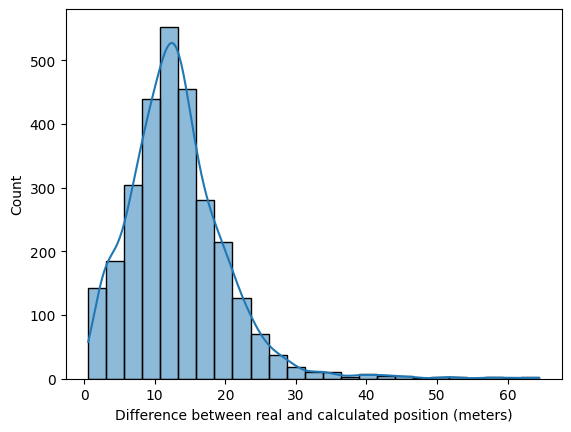

In [30]:
ax = sns.histplot(data=df, x='diff', kde=True, bins=25)


ax.set_xlabel('Difference between real and calculated position (meters)');

As we can see the diff is normally distributed around 11m. We are obtatining a bias of 11m in the position. 

Let's see how error varies with respect to the time.

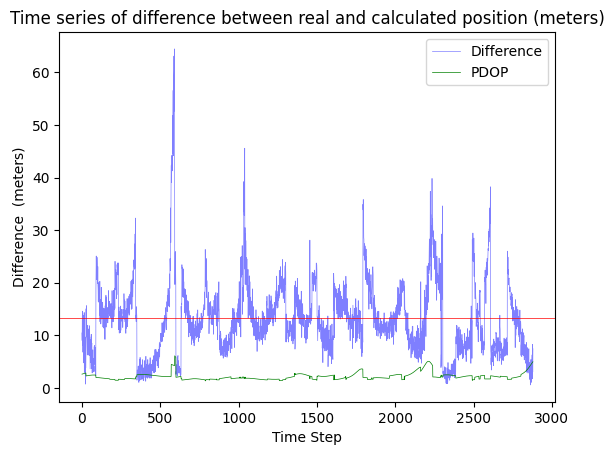

In [42]:
ax = sns.lineplot(x=df.index, y=df['diff'], linewidth=0.5, label='Difference', color='blue', alpha=0.5)
ax.set_xlabel('Time Step')
ax.set_ylabel('Difference  (meters)')
ax.set_title('Time series of difference between real and calculated position (meters)')

# Add a horizontal line at mean of the difference
ax.axhline(df['diff'].mean(), color='red', linewidth=0.5);

# Superimpose GDOP on the plot
ax.plot(df.index, df['PDOP'], linewidth=0.5, label='PDOP', color='green')
ax.legend();

In [38]:
ax = sns.lineplot(x=df.index, y=df['GDOP'], linewidth=0.5)
ax.set_xlabel('Time Step')
ax.set_ylabel('GDOP')
ax.set_title('Time series of GDOP')


# Add a horizontal line at mean of the difference
ax.axhline(df['diff'].mean(), color='red', linewidth=0.5);

0       2.950588
1       2.962691
2       2.974706
3       2.986621
4       2.998427
          ...   
2875    5.638156
2876    5.686951
2877    5.734787
2878    5.781536
2879    5.827087
Name: GDOP, Length: 2880, dtype: float64

This plot indicates that the error is osscilating around the mean value indicated by the horizontal red line.

Let's scatter plot the calculated position and the station position.

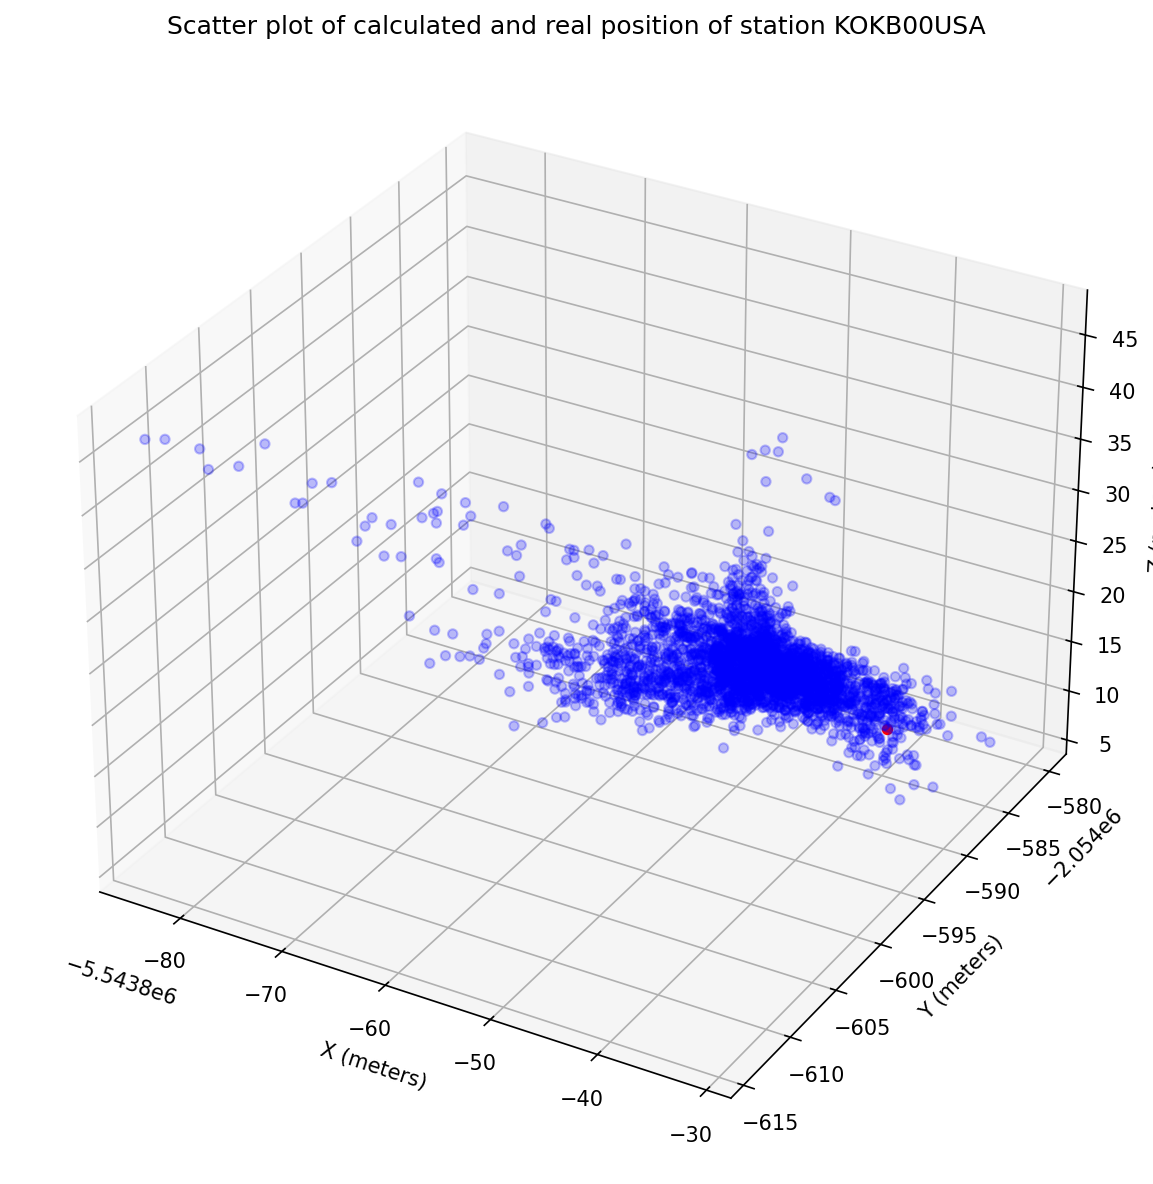

In [32]:
from navigator.utility import IGSNetwork

fig = plt.figure(figsize=(10, 8), dpi=150)
ax = fig.add_subplot(111, projection='3d')

# Plot the calculated positions
ax.scatter(df['x'], df['y'], df['z'], c='blue', label='Calculated Position', alpha=0.25)

# Real coords
real_coord = IGSNetwork().get_xyz(station=first_epoch.station)

# Add a red marker for real position
ax.scatter(
    real_coord[0],
    real_coord[1],
    real_coord[2],
    c='red',
    label='Real Position',
    marker='o',
    s=20,
)

ax.set_xlabel('X (meters)')
ax.set_ylabel('Y (meters)')
ax.set_zlabel('Z (meters)')

ax.set_title('Scatter plot of calculated and real position of station KOKB00USA')
fig.tight_layout()

The red dot indicates the station real coordinate and the blue dots indicates the triangulated positions.

## **Conclusion**

The library demonstrates its ability to parse RINEX files and calculate user positions based on GPS satellite triangulation. Each component within the library operates independently, enabling its use with other GNSS systems such as GLONASS, Galileo, etc. Furthermore, it can handle the download, storage, and processing of large batches of RINEX files.

The existing triangulation interface, named 'GPSIterative,' utilizes linearized navigation equations to determine the user's position with an approximate deviation of 11 meters. Enhancements to this interface could involve leveraging precise orbit and clock data or employing AI tools, which is part of our upcoming research and development.

## **Future Works**

We've developed a comprehensive, modular, and scalable library for GNSS navigation and positioning. However, several tasks remain outstanding. Here are some key areas for future development, along with the necessary skill sets:

1. **Implementing the Kalman Filter for triangulation** \
    This is a more advanced topic and requires a good understanding of the Kalman Filter in GNSS Navigation and its implementation. The candidate should have a good understanding of the library and how to extend functionality by using inheritance and polymorphism. The candidate should also have a good understanding of the `triangulate` module and its classes.

2. **Addition of Other Constellations** \
    This requires a good understanding of RINEX format, rinex parsing, satellite ephemeris and the `satlib` module. This task requires a good understanding of the navigator library and its inner workings. The candidate should also have a good understanding of the `satlib` module and its classes.
    
3. **Extending the parsing RINEX files to v4** \
    Ideally, this should be done by a candidate who has a good knowledge of programming in Python and software engineering (CS majors after sophmore year). Adapeters need to be written to make the rinex files compatible with the current library data format of `pandas.Dataframe`. Parsing format is tightly coupled with other modules like `satlib` and `triangulate`. Hence, the candidate should have a good understanding of the library and its modules.


## References

### ESA Data Processing and Analysis Consortium (DPAC) GNSS Book

- Sanz Subirana, J., Juan Zornoza, J.M., Hernández-Pajares, M. (2013). GNSS Data Processing, Vol. 1: Fundamentals and Algorithms (ESA TM-23/1). Noordwijk, the Netherlands: ESA Communications. ISBN 978-92-9221-886-7.

- Sanz Subirana, J., Juan Zornoza, J.M., Hernández-Pajares, M. (2013). GNSS Data Processing, Vol. 2: Laboratory exercises (ESA TM-23/2). Noordwijk, the Netherlands: ESA Communications. ISBN 978-92-9221-886-7.


### Interface Control Document ICD-GPS-200

- Interface Specification IS-GPS-200. (2922). Retrieved from GPS.gov: [https://www.gps.gov/technical/icwg/IS-GPS-200N.pdf]